In [1]:
%load_ext autoreload
%autoreload 2

# Imports
from typing import List, Dict, Any, Tuple, Generator
import json
import os
import dataclasses as dc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

from connections import Connection, ConnectionDay

In [2]:
# Load data
file_name = "data/connections-2024-05-23.json"
with open(file_name, 'r') as f:
    data = json.load(f)

connections_days = [ConnectionDay(**d) for d in data]
for c in connections_days:
    c.connections = [Connection(**d) for d in c.connections]
print(f"Loaded {len(connections_days)} days of connections")

Loaded 348 days of connections


In [3]:
# Create a df with columns:
# (iteration, topic, level, word)
# df = pd.DataFrame(columns=["iteration", "topic", "level", "word"])
raw_data = []
for i, cd in enumerate(connections_days):
    for c in cd.connections:
        for w in c.words:
            raw_data.append({"iteration": cd.iteration, "topic": c.connection, "level": c.level_number(), "word": w})

df = pd.DataFrame(raw_data, columns=["iteration", "topic", "level", "word"])
df.head()

,iteration,topic,level,word
0,348,CONDUITS FOR WATER REMOVAL,1,DUCT
1,348,CONDUITS FOR WATER REMOVAL,1,DRAIN
2,348,CONDUITS FOR WATER REMOVAL,1,PIPE
3,348,CONDUITS FOR WATER REMOVAL,1,SEWER
4,348,FOOD PRODUCTS ASSOCIATED WITH SENTIMENTALITY,2,CHEESE


<Axes: xlabel='word'>

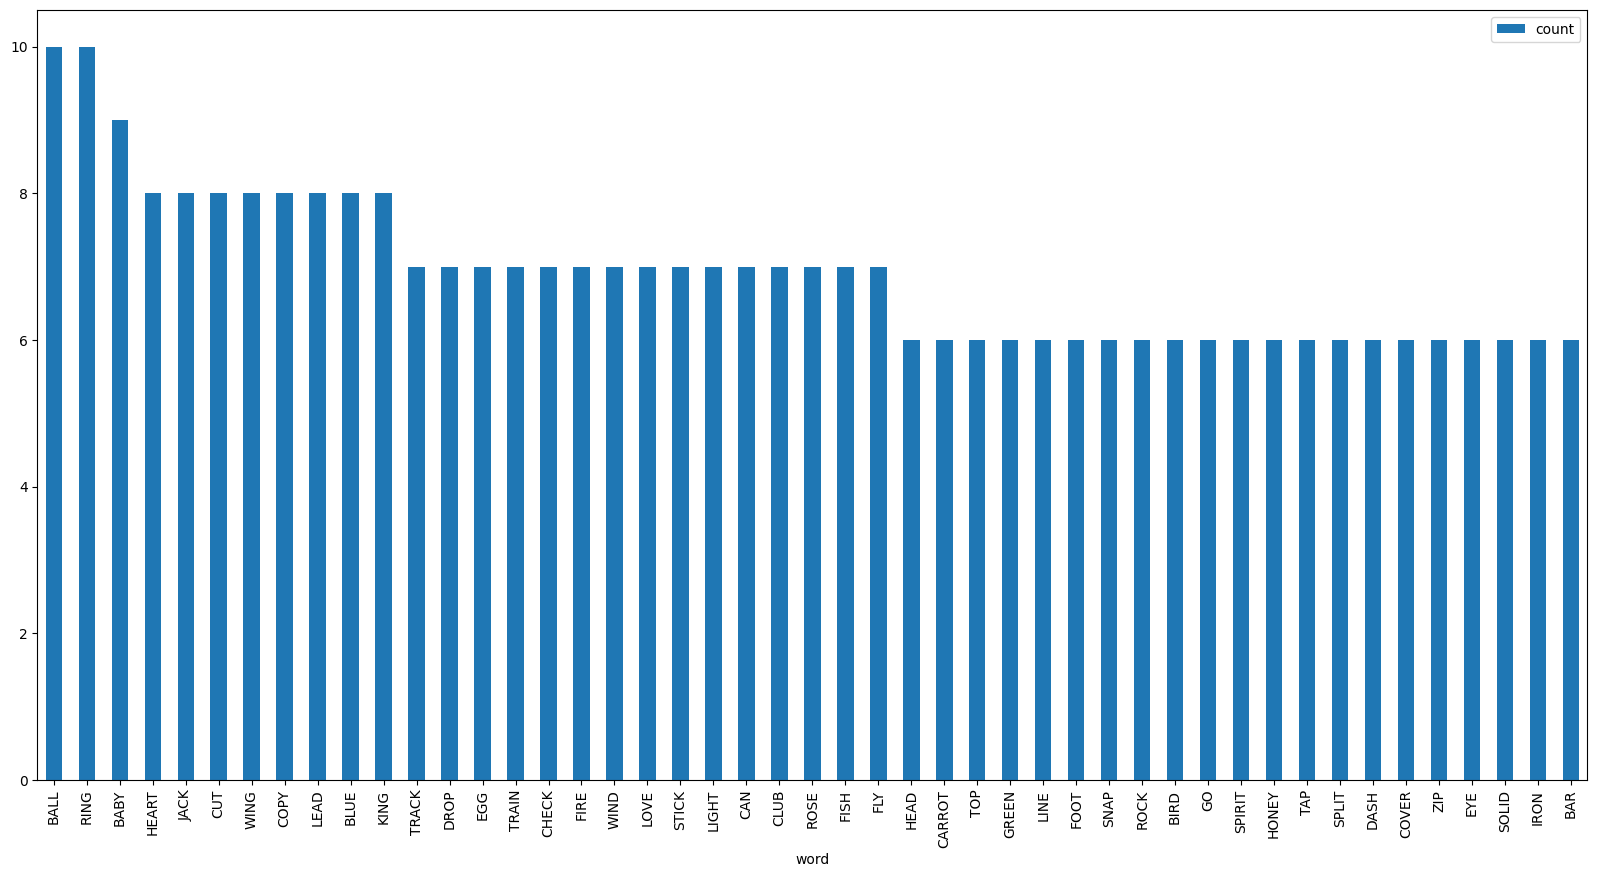

In [17]:
# Plot a stacked bar chart of words, ordered by their frequency, with colors representing the level
word_counts = df.word.value_counts()
word_counts = word_counts.reset_index()
word_counts.columns = ["word", "count"]
word_counts = word_counts.sort_values(by="count", ascending=False)
word_counts = word_counts.reset_index(drop=True)
# Filter for only words that appear more than 5 times
word_counts = word_counts[word_counts["count"] > 5]
word_counts.plot(kind='bar', x='word', y='count', figsize=(20, 10))


<Axes: title={'center': 'Word frequency by level, of the top 20 most frequent words'}, xlabel='word'>

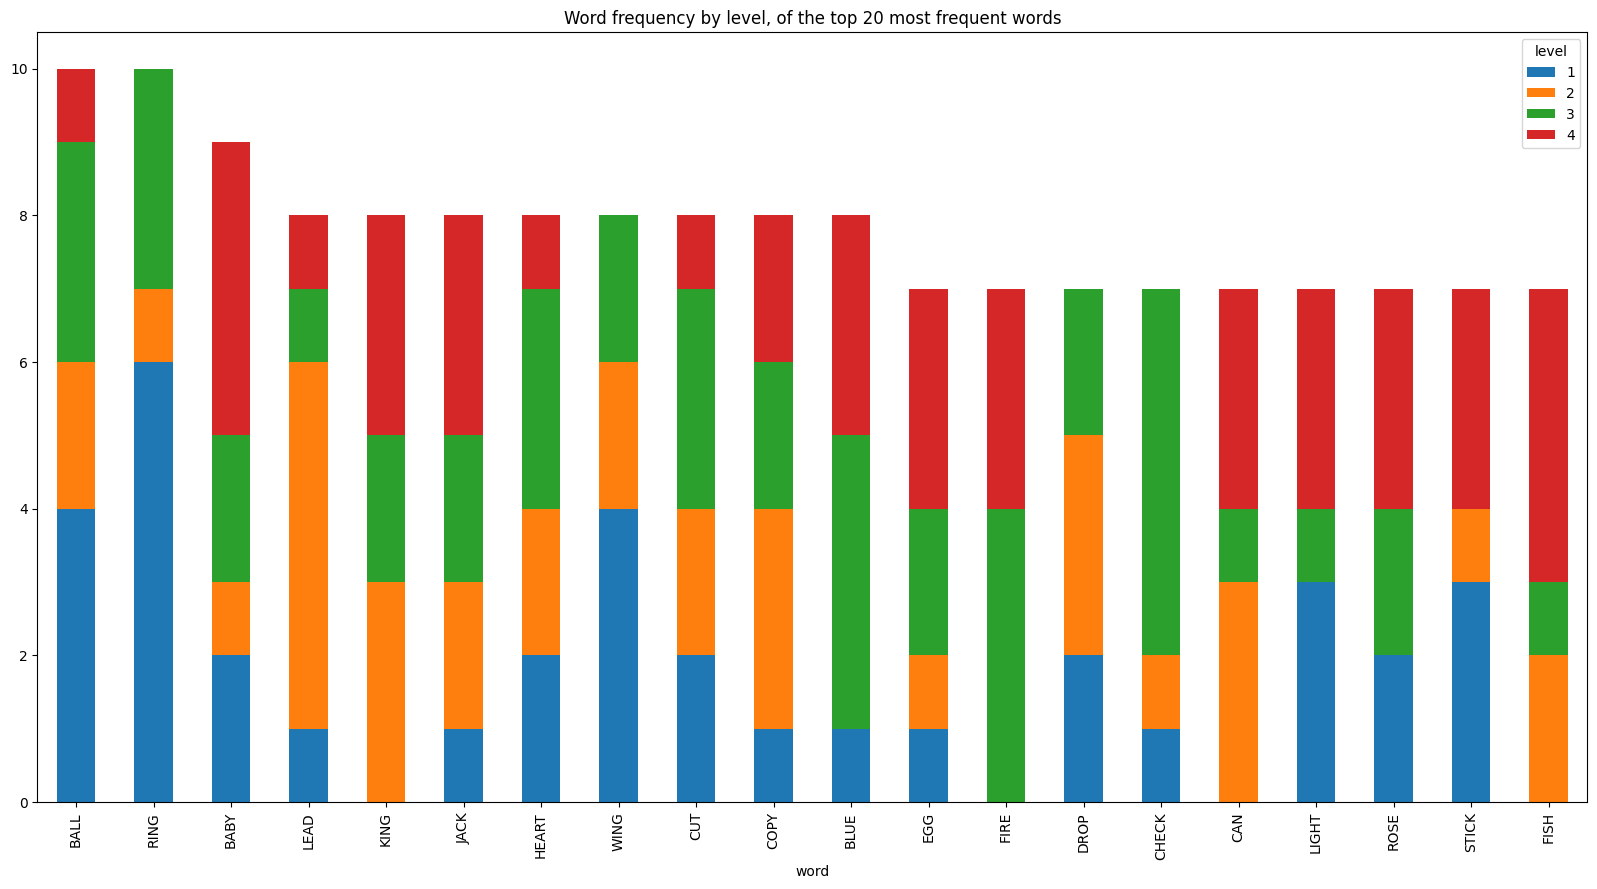

In [22]:
# Plot a stacked bar chart of words, ordered by their frequency, with colors representing the level
word_freq = df.groupby(['word', 'level'], as_index=False).size()
word_freq = word_freq.sort_values(by="size", ascending=False)
words_to_keep = df.groupby('word').size().sort_values(ascending=False).head(20).index
word_freq = word_freq[word_freq.word.isin(words_to_keep)]

word_freq = word_freq.pivot(index='word', columns='level', values='size')
word_freq = word_freq.fillna(0)
# sort by the sum of the columns
word_freq = word_freq.loc[word_freq.sum(axis=1).sort_values(ascending=False).index]
word_freq.plot(kind='bar', stacked=True, figsize=(20, 10), title="Word frequency by level, of the top 20 most frequent words")